<a href="https://colab.research.google.com/github/pAbhit007/Machine-Learning-Models-Code/blob/main/gdr_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Generating Datas

In [2]:
n_samples = 100
X, y = make_regression(n_samples=n_samples, n_features=1, n_informative=1, n_targets=1, noise=20)

In [3]:
# Check the shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (100, 1)
Shape of y: (100,)


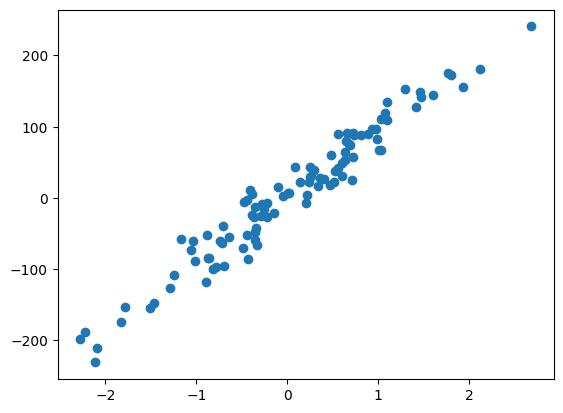

In [4]:
plt.scatter(X,y)

In [5]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [6]:
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[92.48860446]
2.2185833740973795


# Gradient Descent Regression

Taking m as constant over here


In [15]:
m = 92.48

In [7]:
class GDRegg:
  def __init__(self,learning_rate,epochs):
    self.m = 92.48
    self.b = -120
    self.lr = learning_rate
    self.epochs = epochs
    self.losses = []

  def fit(self,X,y):
    # calculate the b using GD
    for i in range(self.epochs):
      loss_slope = -2*np.sum(y-self.m*X.ravel()-self.b)
      self.b= self.b-(self.lr*loss_slope)
      self.losses.append(loss_slope)
      #print(loss_slope,self.b)
    print(self.b)


In [9]:
gd = GDRegg(0.001,200)

In [10]:
gd.fit(X,y)

2.2190107262863443


# Gradient Descent - II


In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)

In [13]:
lr.fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[90.53612024]
-0.07275796890182296


In [14]:
y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9330181011293492

In [16]:
np.mean(cross_val_score(lr,X_train,y_train,scoring ='r2',cv=10))

0.9335394907847478

In [17]:
class GDRegg2:
  def __init__(self,learning_rate,epochs):
    self.m = 100
    self.b = -120
    self.lr = learning_rate
    self.epochs = epochs
    self.losses = []

  def fit(self,X,y):
    # calculate the b using GD
    for i in range(self.epochs):
      loss_slope_b = -2*np.sum(y-self.m*X.ravel()-self.b)
      loss_slope_m = -2*np.sum((y-self.m*X.ravel()-self.b)*X.ravel())
      self.b= self.b-(self.lr*loss_slope_b)
      self.m= self.m-(self.lr*loss_slope_m)
      #self.losses.append(loss_slope_)
      #print(loss_slope_b,self.b)
    print(self.m,self.b)
  def predict(self,X):
    return self.m*X+self.b


In [18]:
gd = GDRegg2(0.001,100)

In [19]:
gd.fit(X_train,y_train)

90.53612341796703 -0.07276308259199642


In [20]:
y_pred = gd.predict(X_test)
r2_score(y_test,y_pred)

0.9330180943555211

# Visualization


In [29]:
import numpy as np

# Define arrays for testing different values of slope (m) and intercept (b)
m_arr = np.linspace(-150, 150, 10)
b_arr = np.linspace(-150, 150, 10)

# Create a meshgrid of slope and intercept values
mGrid, bGrid = np.meshgrid(m_arr, b_arr)

# Stack the meshgrid values to create a grid of (m, b) pairs
final = np.vstack((mGrid.ravel().reshape(1,100), bGrid.ravel().reshape(1,100))).T

# Initialize an empty list to store the loss values
z_arr = []

# Iterate over each pair of (m, b) values in the grid
for i in range(final.shape[0]):
    # Compute the loss for the current (m, b) pair
    loss = np.sum((y - final[i, 0] * X.reshape(100) - final[i, 1]) ** 2)
    # Append the loss to the list
    z_arr.append(loss)

# Reshape the list of loss values to match the shape of the meshgrid
z_arr = np.array(z_arr).reshape(10, 10)


In [31]:
import plotly.graph_objects as go

# Create a 3D surface plot using Plotly
fig = go.Figure(data=[go.Surface(x=m_arr, y=b_arr, z=z_arr)])

# Update the layout of the figure
fig.update_layout(
    title='Cost Func.',  # Title of the plot
    autosize=False,         # Disable autosizing of the plot
    width=500,              # Set the width of the plot
    height=500,             # Set the height of the plot
    margin=dict(l=65, r=50, b=65, t=90)  # Set margins around the plot
)

# Show the plot
fig.show()

# Write the HTML representation of the plot to a file
fig.write_html("cost_function.html")


In [32]:
# Initial values for intercept (b), slope (m), and learning rate (lr)
b = 150
m = -127.82
lr = 0.001

# Lists to store values of intercept, slope, and cost function during optimization
all_b = []
all_m = []
all_cost = []

# Number of epochs (iterations) for gradient descent
epochs = 30

# Loop over the specified number of epochs
for i in range(epochs):
    # Initialize gradients and total cost for this epoch
    slope_b = 0
    slope_m = 0
    cost = 0

    # Iterate over each data point in the dataset
    for j in range(X.shape[0]):
        # Compute the gradients with respect to intercept and slope using the current values of b and m
        slope_b = slope_b - 2 * (y[j] - (m * X[j]) - b)
        slope_m = slope_m - 2 * (y[j] - (m * X[j]) - b) * X[j]

        # Compute the total cost for this epoch (sum of squared errors)
        cost = cost + (y[j] - m * X[j] - b) ** 2

    # Update intercept and slope using gradient descent
    b = b - (lr * slope_b)
    m = m - (lr * slope_m)

    # Append the updated values of intercept, slope, and cost to their respective lists
    all_b.append(b)
    all_m.append(m)
    all_cost.append(cost)


In [33]:
import plotly.express as px
import plotly.graph_objects as go

# Create a 3D scatter plot of the optimization path
fig = px.scatter_3d(x=np.array(all_m).ravel(), y=np.array(all_b).ravel(), z=np.array(all_cost).ravel()*100)

# Add the surface plot of the cost function
fig.add_trace(go.Surface(x=m_arr, y=b_arr, z=z_arr*100))

# Show the plot
fig.show()

# Write the HTML representation of the plot to a file
fig.write_html("cost_function2.html")


In [34]:
import plotly.graph_objects as go

# Create a scatter plot of the optimization path
fig = go.Figure(go.Scatter(
    x=np.array(all_m).ravel(),  # x-coordinates from all_m
    y=np.array(all_b).ravel(),  # y-coordinates from all_b
    name='Optimization Path',   # Name of the scatter plot
    line=dict(color='#fff', width=4)  # Line properties
))

# Add a contour plot of the cost function
fig.add_trace(go.Contour(
    z=z_arr,  # z-values from z_arr
    x=m_arr,  # x-coordinates from m_arr
    y=b_arr   # y-coordinates from b_arr
))

# Show the plot
fig.show()


In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(1, 1)

# Set the figure size
plt.figure(figsize=(18, 4))

# Create a filled contour plot
cp = ax.contourf(m_arr, b_arr, z_arr)

# Plot the optimization path on the contour plot
ax.plot(np.array(all_m).ravel(), np.array(all_b).ravel(), color='white')

# Add a colorbar to the plot
fig.colorbar(cp)

# Set the title, x-axis label, and y-axis label of the plot
ax.set_title('Filled Contours Plot')
ax.set_xlabel('m')
ax.set_ylabel('b')

# Show the plot
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>